# LAB: Pipelines y Transformadores


## 1. Introducción
En este Lab vamos a crear Pipelines para pre-procesar datos y extraer características sobre el [Titanic dataset](http://www.kaggle.com/c/titanic-gettingStarted/data).

El dataset es una lista de pasajeros del trasatlántico más famoso. La segunda columna del dataset ("survived") indica si la persona ha sobrevivido (1) o no (0) al naufragio. El resto de las columnas contienen información diversa sobre cada uno de los pasajeros.

* Levantamos el dataset (Titanic.csv) en un DataFrame.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos a hacer una primera exploración de los datos:

- ¿Hay features numéricas?
- ¿Hay features categóricas?
- ¿Hay datos incompletos? ¿En qué columnas?
- ¿Cuáles te parecen importantes para rellenar?

# 2. Preprocesando cada grupo de columnas

Observamos que el preprocesamiento de los datos requiere distintos enfoques para distintos tipos de columnas: algunas requieren imputación, otras requieren generar variables Dummies y otras sería conveniente estandarizarlas.

La idea es armar un pipeline separado para el preprocesamiento que necesita cada grupo de variables y luego unirlos todos con el método make_union() que ejecutará todos los pipelines para luego concatenar el resultado.

Para hacer las transformaciones de cada grupo de columnas sugerimos crear un transformer de sklearn ColumnSelector que permita seleccionar un grupo de columnas del DataFrame donde queremos aplicar las transformaciones.



## 2.1 Edad

Se puede observar que hay varios pasajeros sin información de edad (columna "Age"). Vamos a intentar llenar los datos de esta columna. Exploremos la distribución de valores para los datos existentes y pensemos una estrategia.

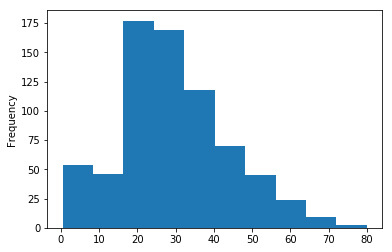

In [7]:
df.Age.plot(kind = 'hist');

#### Transformador de Edad

Dependiendo la estrategia que hayamos decido vamos a necesitar imputar los datos de edad faltantes, ya sea usando un transformador del módulo de pre-procesamiento o crear un transformador custom transformer.
Esto podría implicar:

- Llenar los datos faltantes
- Escalar los valores de Edad

¿Qué clases de sklearn permiten imputar datos y llenar valores faltantes?

## 2.2. Variables Categóricas

"Embarked" y "Pclass" son variables categóricas. Usá la función get_dummies de pandas para crear columnas correspondientes a los valores de las mismas.

"Embarked" tiene un par de datos faltantes. Llenalos con el puerto de embarque más común en el dataset.

Sugerencia: Crear un transformador custom que "envuelva" el uso de get_dummies.

## 2.3  Estandarizar la Tarifa

Escalar el atributo "Fare" (Tarifa) usando uno de los escaladores existentes en el módulo de preprocesamiento. 

## 3. Union

Utilizá una FeatureUnion o la función make_union para combinar todos los pipelines que has creado.

## 4. Predicciones

Ahora utilicemos GridSearch para evaluar la performance de estas transformaciones, seguidas de un modelo SVM. 
Para esto exploren distintos valores de parámetros para C y Gamma.

Hagan un split entre train y test.



## 5. Performance sobre datos nuevos

Con el mejor modelo seleccionado mediante cross validation en los datos de entrenamiento, evalúen el accuracy y el classification report sobre datos no observados.
